In [1]:
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.time import 
from mesa.datacollection import DataCollector
import random
from RS_Algo import *
from Algo_Genetique import *
from Algo_Tabou import *

In [2]:
import math
import importlib
import os.path
import sys

import os

# Récupère le chemin d'accès parent de sys.path[0]
parent_dir = os.path.dirname(sys.path[0])

sys.path.append(os.path.abspath(parent_dir))

import fonctions
importlib.reload(fonctions)
from fonctions import *
from math import inf
from math import inf

In [3]:
n = 50
class Agent_Tabou(Agent):
    def __init__(self,unique_id,liste_initiale, taille_tabou, max_iterations):
        self.unique_id = unique_id
        self.liste_initiale =[i for i in range(n)] 
        self.taille_tabou = n
        self.max_iterations = 2000
        self.solution = None
        self.cout = 0

    def step(self):
        self.solution = tabou(self.liste_initiale, self.taille_tabou, self.max_iterations)[0]
        self.cout = tabou(self.liste_initiale, self.taille_tabou, self.max_iterations)[1]


In [4]:
class Agent_Genetique(Agent):
    def __init__(self,unique_id,taille_population, taille_solution, taux_mutation, max_iterations):
        self.unique_id = unique_id
        self.taille_population = taille_population
        self.taille_solution = taille_solution
        self.taux_mutation = taux_mutation
        self.max_iterations = max_iterations
        self.solution =None
        self.cout = 0
    def step(self):
        self.solution = genetique(self.taille_population, self.taille_solution, self.taux_mutation, self.taille_populationmax_iterations)[0]
        self.solution = genetique(self.taille_population, self.taille_solution, self.taux_mutation, self.taille_populationmax_iterations)[1]


In [54]:
class Agent_RS(Agent):
    def __init__(self, unique_id,initial_state,  temperature_initiale, temperature_finale, alpha):
        self.unique_id = unique_id
        self.initial_state = initial_state
        self.temperature_initiale=1.0
        self.temperature_finale = math.exp(-8)
        self.alpha = 0.99
        self.solution = None
        self.cout = 0
    def step(self):
        self.solution = recuit_simule(self.initial_state,  self.temperature_initiale, self.temperature_finale, self.alpha)[0]
        self.cout = recuit_simule(self.initial_state,  self.temperature_initiale, self.temperature_finale, self.alpha)[1]


In [37]:
reserved_list =[] #liste de codage à préciser 
Pool = [generate_solution(reserved_list)['solution'] for i in range(100)]
len(Pool[0][0])

25

In [55]:
def lambda_ij(sol1,sol2):
    d = 0
    if len(sol1) < len(sol2):
        sol1,sol2=sol2,sol1
    for i in range(len(sol2)-1):
        for j in range(len(sol1)-1):
            if sol1[j]==sol2[i] and sol1[j+1]==sol2[i+1]:
                d+=1
    return d 
#cette fonction compare les arcs entre les solutions 
A = [1,2,5,7,8,9,4]
B = [1,2,5,10,8,9]
lambda_ij(B,B)

5

In [57]:
def phi(sol1,sol2,pr):
    if lambda_ij(sol1,sol2) <= pr:
        return 1-lambda_ij(sol1,sol2)/pr
    else : return 0
def g(sol_initiale,Pool,pr):
    return sum([phi(sol_initiale,sol,pr) for sol in Pool])



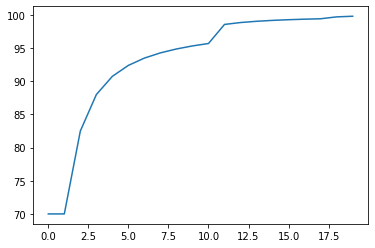

In [78]:

G = [g(Pool[0],Pool,t) for t in [0.1, 1,2,3,4,5,6,7,8,9,10,40,50,60,70,80,90,100,200,300]]
import matplotlib.pyplot as plt
plt.plot(G)

In [82]:
n = 50
liste_initiale = [i for i in range(n)]
taille_tabou = n
max_iterations = 2000
class MyModel1(Model):
    def __init__(self):
        self.schedule = RandomActivation(self)
        self.agents = []
        agent_Tabou = Agent_Tabou(1,liste_initiale, taille_tabou, max_iterations)
        self.schedule.add(agent_Tabou)
        self.agents.append(agent_Tabou)
        agent_RS =Agent_RS(2,initial_state=liste_initiale,  temperature_initiale=1.0, temperature_finale=1e-8, alpha=0.99)
        self.schedule.add(agent_RS)
        self.agents.append(agent_RS)
        #agent_genetique = Agent_Genetique()
        #self.schedule.add(agent_genetique)
        #self.agents.append(agent_genetique)
        #self.datacollector = DataCollector( model_reporters={"solutions":self.get_solutions(),"cout":self.get_cout()})
        

    def step(self):
        self.schedule.step()
        agent_Tabou = Agent_Tabou(1,self.get_solutions()[0], taille_tabou, max_iterations)
        agent_RS =Agent_RS(2,initial_state=self.get_solutions()[1],  temperature_initiale=1.0, temperature_finale=1e-8, alpha=0.99)
    def get_solutions(self):
        return [agent.solution for agent in self.schedule.agents]
    def get_cout(self):
        return [agent.cout for agent in self.schedule.agents]
    

In [83]:
model = MyModel1()
population = []
couts = []
for i in range(3):
    model.step()
    
    population.append(model.get_solutions())
    couts.append(model.get_cout())

taille_solution = 50
taux_mutation = 0
max_iterations = 500
#ici on doit changer l'algo génétique pour prndre une population en entrée et non pas la taille de la population
#genetique(population, taille_solution, taux_mutation, max_iterations)

809.5956742845365
809.5956742845365
809.5956742845365
809.5956742845365
809.5956742845365
809.5956742845365
809.5956742845365
809.5956742845365
809.5956742845365
809.5956742845365
809.5956742845365
809.5956742845365
808.7572770630546
808.7217445517927
808.7217445517927
808.7217445517927
808.7217445517927
808.7217445517927
806.4310439292278
806.4310439292278
806.4310439292278
805.9160208134306
805.9160208134306
805.9160208134306
805.9160208134306
805.9160208134306
805.9160208134306
805.9160208134306
805.9160208134306
805.9160208134306
805.9160208134306
804.9036368610608
804.9036368610608
804.9036368610608
804.9036368610608
804.9036368610608
804.9036368610608
804.9036368610608
804.9036368610608
804.9036368610608
804.9036368610608
804.9036368610608
804.9036368610608
804.9036368610608
804.9036368610608
804.9036368610608
804.9036368610608
804.9036368610608
804.9036368610608
804.9036368610608
804.9036368610608
804.9036368610608
804.9036368610608
804.9036368610608
804.9036368610608
804.903636

In [84]:
population[0]

[[35,
  1,
  42,
  3,
  37,
  5,
  6,
  7,
  8,
  12,
  4,
  11,
  9,
  13,
  14,
  15,
  16,
  36,
  18,
  19,
  27,
  49,
  22,
  23,
  17,
  40,
  26,
  20,
  0,
  29,
  30,
  39,
  32,
  21,
  34,
  24,
  10,
  31,
  38,
  41,
  25,
  33,
  44,
  43,
  2,
  45,
  46,
  47,
  48,
  28],
 [19,
  21,
  36,
  49,
  18,
  0,
  19,
  1,
  37,
  47,
  21,
  0,
  49,
  39,
  1,
  37,
  29,
  40,
  39,
  0,
  6,
  1,
  24,
  49,
  44,
  37,
  16,
  37,
  39,
  16,
  9,
  2,
  41,
  37,
  43,
  5,
  2,
  15,
  8,
  13,
  7,
  32,
  42,
  34,
  47,
  37,
  29,
  44,
  17,
  12]]

In [36]:
distance_sol(population[0][0],population[1][0])

3